## Importando librerías

In [4]:
from keras.datasets import mnist
from keras import layers, models
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Nuestro set de datos

In [5]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
train_data.shape

(60000, 28, 28)

In [7]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<function matplotlib.pyplot.show(*args, **kw)>

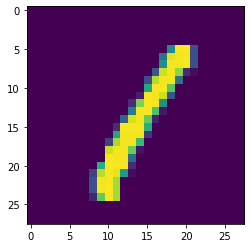

In [9]:
plt.imshow(train_data[3])
plt.show

In [ ]:
train_labels[45]

9

## Creando un modelo de datos

In [63]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
#model.add(layers.Dense(50,kernel_initializer= "uniform",activation='relu'))
#model.add(layers.Dense(100,kernel_initializer= "uniform",activation='softmax'))
#model.add(layers.Dense(50,kernel_initializer= "uniform",activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [64]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 50)                25650     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                510       
Total params: 438,230
Trainable params: 438,230
Non-trainable params: 0
_________________________________________________________________


## Limpieza de datos

In [31]:
x_train = train_data.reshape((60000,28,28))


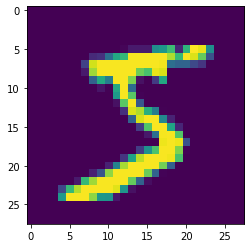

In [32]:
plt.imshow(x_train[0])

```
reshape((60000,28,28))==reshape((60000,28*28))
```

In [33]:
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [34]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [35]:
train_labels[0]

5

In [36]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Entrenando el modelo

In [65]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2620 - accuracy: 0.9245
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1039 - accuracy: 0.9693
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0684 - accuracy: 0.9796
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0499 - accuracy: 0.9851
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0380 - accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0281 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0218 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0172 - accuracy: 0.9948
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0130 - accuracy: 0.9962
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0103 - accuracy: 0.9971

## Evaluando sobre data de test

In [66]:
model.evaluate(x_test,y_test)[1]*100

313/313 [==============================] - 0s 802us/step - loss: 0.0671 - accuracy: 0.9818


98.18000197410583